In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
os.chdir(
    "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_D to organization_exclude hypothesis/crowding_aging_Hela"
)
data = pd.read_csv("N_and_Fraction_per_replicate.csv")

lst_labels = [
    "0Dex, -, 0h",
    "0Dex, -, 3h",
    "0Dex, -, 6h",
    "0Dex, -, 8h",
    "0Dex, Hela, 0h",
    "10Dex, -, 0h",
    "10Dex, -, 3h",
    "10Dex, -, 6h",
    "10Dex, -, 8h",
    "10Dex, Hela, 0h",
]

color_palette = [
    "#9b2226",
    "#8d2a2e",
    "#582326",
    "#333232",
]

In [3]:
N_total = data["N, Total"].to_numpy(int)
N_mobile = data["N, Mobile"].to_numpy(int)
N_static = N_total - N_mobile
N_constrained = data["N, Constrained"].to_numpy(int)
N_normal = N_mobile - N_constrained

# frac_static = N_static / N_total
# frac_constrained = N_constrained / N_total
# frac_normal = N_normal / N_total

# data["Static"] = frac_static
# data["Constrained"] = frac_constrained
# data["Normal"] = frac_normal

# New constrained includes static ones
frac_constrained = 1 - (N_normal / N_total)
data["Constrained"] = frac_constrained

### No Dex Aging

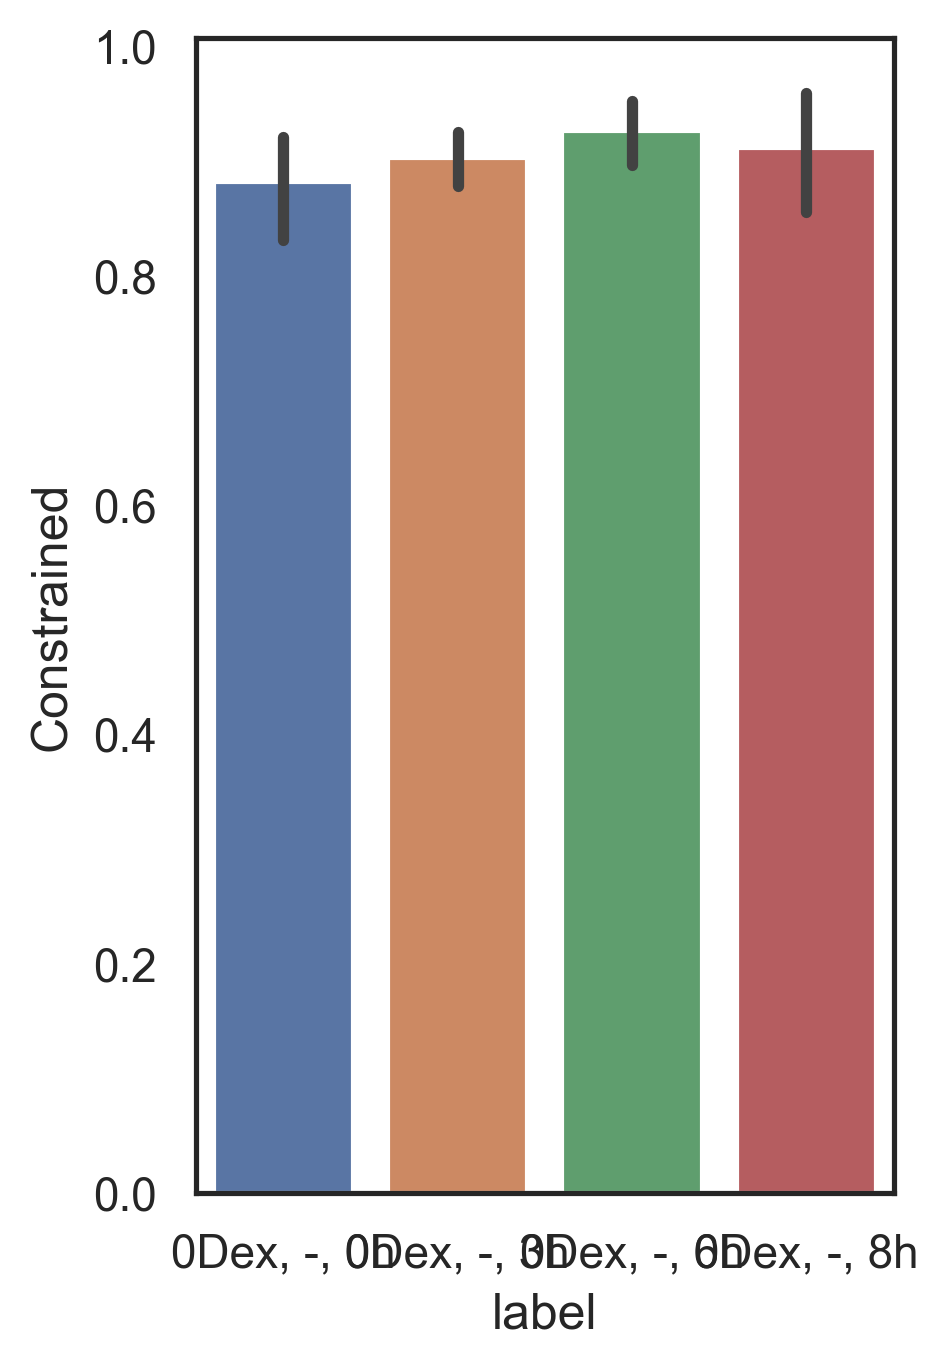

In [4]:
plt.figure(figsize=(3, 5), dpi=300)
labels = [
    "0Dex, -, 0h",
    "0Dex, -, 3h",
    "0Dex, -, 6h",
    "0Dex, -, 8h",
]
df_fractions = data[data["label"].isin(labels)][["label", "Constrained"]]

sns.barplot(
    data=df_fractions,
    x="label",
    y="Constrained",    
)

plt.show()